In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Tcs\Downloads\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(df.shape)
df.info()
df.describe()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(strategy = 'mean')
df['Age'] = imputer.fit_transform(df[['Age']])
print(df['Age'].isnull().sum())

0


Empty DataFrame
Columns: [Name, Age, Pclass]
Index: []


In [10]:
df['Cabin'] = df['Cabin'].fillna(value='Unknown')
print(df['Cabin'])

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object


In [13]:
print("Missing before:", df['Embarked'].isnull().sum())
mode_value = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_value)
print("Missing after:", df['Embarked'].isnull().sum())

Missing before: 2
Missing after: 0


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
print(df['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


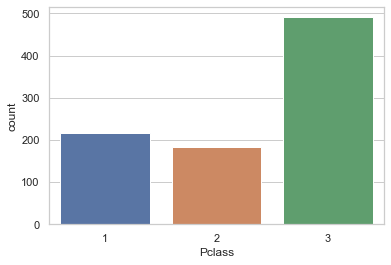

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.countplot(x='Pclass',data=df)
plt.show()

In [28]:
survived_females = df[(df['Sex'] == 0) & (df['Survived'] == 1)]
print(survived_females['Name'])

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
874                Abelson, Mrs. Samuel (Hannah Wizosky)
875                     Najib, Miss. Adele Kiamie "Jane"
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
887                         Graham, Miss. Margaret Edith
Name: Name, Length: 233, dtype: object


In [29]:
young_3rd_class = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print(young_3rd_class)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

     Sex           Age  SibSp  Parch   

In [41]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
passengers_class1_over40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print(passengers_class1_over40[['Name', 'Age', 'Pclass']])



Empty DataFrame
Columns: [Name, Age, Pclass]
Index: []


In [51]:
survived_class1_over40 = passengers_class1_over40[passengers_class1_over40['Survived'] == 1]
print(survived_class1_over40[['Name', 'Age', 'Pclass', 'Survived']])


Empty DataFrame
Columns: [Name, Age, Pclass, Survived]
Index: []


In [45]:
embarked_C_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print(embarked_C_class2[['Name', 'Embarked', 'Pclass']])


                                                  Name Embarked  Pclass
9                  Nasser, Mrs. Nicholas (Adele Achem)        C       2
43            Laroche, Miss. Simonne Marie Anne Andree        C       2
122                               Nasser, Mr. Nicholas        C       2
135                                 Richard, Mr. Emile        C       2
181                                   Pernot, Mr. Rene        C       2
292                             Levy, Mr. Rene Jacques        C       2
308                                Abelson, Mr. Samuel        C       2
361                          del Carlo, Mr. Sebastiano        C       2
389                              Lehmann, Miss. Bertha        C       2
473       Jerwan, Mrs. Amin S (Marie Marthe Thuillard)        C       2
547                         Padro y Manent, Mr. Julian        C       2
608  Laroche, Mrs. Joseph (Juliette Marie Louise La...        C       2
685             Laroche, Mr. Joseph Philippe Lemercier        C 

In [46]:

more_than_2_sibsp = df[df['SibSp'] > 2]
print(more_than_2_sibsp[['Name', 'SibSp']])


                                                  Name  SibSp
7                       Palsson, Master. Gosta Leonard      3
16                                Rice, Master. Eugene      4
24                       Palsson, Miss. Torborg Danira      3
27                      Fortune, Mr. Charles Alexander      3
50                          Panula, Master. Juha Niilo      4
59                  Goodwin, Master. William Frederick      5
63                               Skoog, Master. Harald      3
68                     Andersson, Miss. Erna Alexandra      4
71                          Goodwin, Miss. Lillian Amy      5
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...      3
88                          Fortune, Miss. Mabel Helen      3
119                  Andersson, Miss. Ellis Anna Maria      4
159                         Sage, Master. Thomas Henry      8
164                       Panula, Master. Eino Viljami      4
171                               Rice, Master. Arthur      4
176     

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print("Before Scaler")
print(df['Age'],"\n",df['Fare'])
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])
print("After Scaler")
print(df['Age'],"\n",df['Fare'])

Before Scaler
0     -5.924806e-01
1      6.387890e-01
2     -2.846632e-01
3      4.079260e-01
4      4.079260e-01
           ...     
886   -2.077088e-01
887   -8.233437e-01
888   -2.232906e-16
889   -2.846632e-01
890    1.770629e-01
Name: Age, Length: 891, dtype: float64 
 0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
         ...   
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: Fare, Length: 891, dtype: float64
After Scaler
0     -5.924806e-01
1      6.387890e-01
2     -2.846632e-01
3      4.079260e-01
4      4.079260e-01
           ...     
886   -2.077088e-01
887   -8.233437e-01
888   -1.834173e-16
889   -2.846632e-01
890    1.770629e-01
Name: Age, Length: 891, dtype: float64 
 0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
         ...   
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: Fare, Length: 891, dtype: float64


In [47]:
no_family_died = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print(no_family_died[['Name', 'Survived', 'SibSp', 'Parch']])


                                     Name  Survived  SibSp  Parch
4                Allen, Mr. William Henry         0      0      0
5                        Moran, Mr. James         0      0      0
6                 McCarthy, Mr. Timothy J         0      0      0
12         Saundercock, Mr. William Henry         0      0      0
14   Vestrom, Miss. Hulda Amanda Adolfina         0      0      0
..                                    ...       ...    ...    ...
882          Dahlberg, Miss. Gerda Ulrika         0      0      0
883         Banfield, Mr. Frederick James         0      0      0
884                Sutehall, Mr. Henry Jr         0      0      0
886                 Montvila, Rev. Juozas         0      0      0
890                   Dooley, Mr. Patrick         0      0      0

[374 rows x 4 columns]


In [48]:
top5_oldest_survived = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print(top5_oldest_survived[['Name', 'Age', 'Survived']])


                                          Name       Age  Survived
630       Barkworth, Mr. Algernon Henry Wilson  3.870872         1
483                     Turkula, Mrs. (Hedwig)  2.562648         1
275          Andrews, Miss. Kornelia Theodosia  2.562648         1
570                         Harris, Mr. George  2.485693         1
829  Stone, Mrs. George Nelson (Martha Evelyn)  2.485693         1


In [49]:
zero_fare = df[df['Fare'] == 0]
print(zero_fare[['Name', 'Fare']])


Empty DataFrame
Columns: [Name, Fare]
Index: []


In [50]:
from sklearn.model_selection import train_test_split
df.dropna(subset=['Age', 'Fare', 'Embarked', 'Sex'], inplace=True)


df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


X = df_encoded[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (712, 7)
Test shape: (179, 7)
